In [7]:
from dsan_globals import *

/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


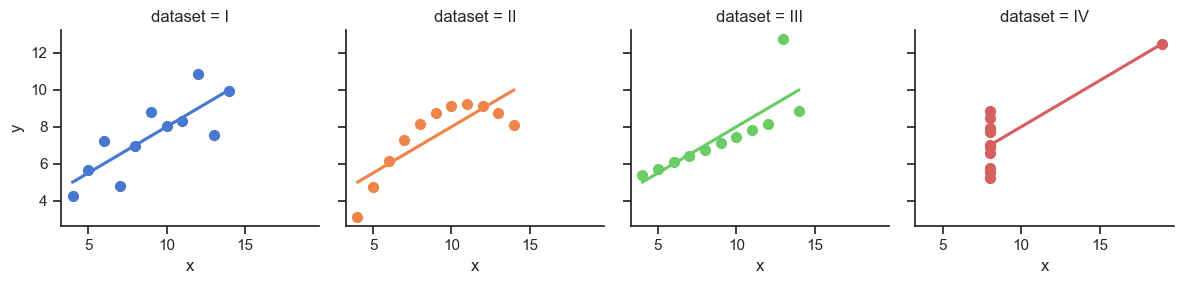

In [10]:
#| label: anscombe-quartet
#| fig-align: center
#| fig-height: 3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks")
# https://towardsdatascience.com/how-to-use-your-own-color-palettes-with-seaborn-a45bf5175146
sns.set_palette(sns.color_palette(cb_palette))

# Load the example dataset for Anscombe's quartet
anscombe_df = sns.load_dataset("anscombe")
#print(anscombe_df)

# Show the results of a linear regression within each dataset
anscombe_plot = sns.lmplot(
    data=anscombe_df, x="x", y="y", col="dataset", hue="dataset",
    col_wrap=4, palette="muted", ci=None,
    scatter_kws={"s": 50, "alpha": 1},
    height=3
);
anscombe_plot;


In [16]:
anscombe_df.groupby("dataset")['x'].mean()

dataset
I      9.0
II     9.0
III    9.0
IV     9.0
Name: x, dtype: float64

In [15]:
anscombe_df.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

In [11]:

#| label: anscombe-mean-sd
# Compute dataset means
means = anscombe_df.groupby('dataset').apply(np.mean).apply(lambda x: round(x,2))
print(means)

#| label: anscombe-sd
# Compute dataset SDs
just_sd = lambda x: np.std(x, axis=0)
sds = anscombe_df.groupby('dataset').apply(just_sd).apply(lambda x: round(x,2))
print(sds)

dataset
I      8.25
II     8.25
III    8.25
IV     8.25
dtype: float64
            x     y
dataset            
I        3.16  1.94
II       3.16  1.94
III      3.16  1.94
IV       3.16  1.94


In [17]:
anscombe_df.groupby('dataset').corr()

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000